In [1]:
#princess.pyをダウンロードしてから以下を実行してください。
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable,Chain,config,cuda

import princess as ohm

In [2]:
train,test = ds.get_fashion_mnist()
xtrain,ttrain = con.concat_examples(train)
xtest,ttest = con.concat_examples(test)

60000 784


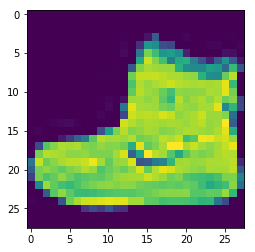

In [3]:
Dtrain,N = xtrain.shape
print(Dtrain,N)
plt.imshow(xtrain[0,:].reshape(28,28))
plt.show()

In [4]:
C = ttrain.max()+1

NN = Chain(l1=L.Linear(N,400),l2=L.Linear(400,C),
                    bnorm1 =  L.BatchNormalization(400))

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    y = NN.l2(h)
    return y

In [5]:
gpu_device = 0
cuda.get_device(gpu_device).use()
NN.to_gpu(gpu_device)

In [6]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [7]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

data = cuda.to_gpu([xtrain,xtest,ttrain,ttest])
result = [train_loss,test_loss,train_acc,test_acc]

In [10]:
ohm.learning_classification(model,optNN,data,result,100)

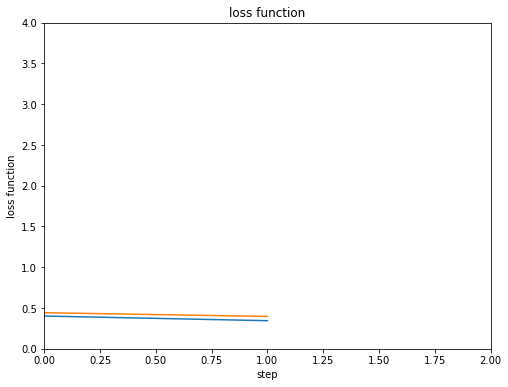

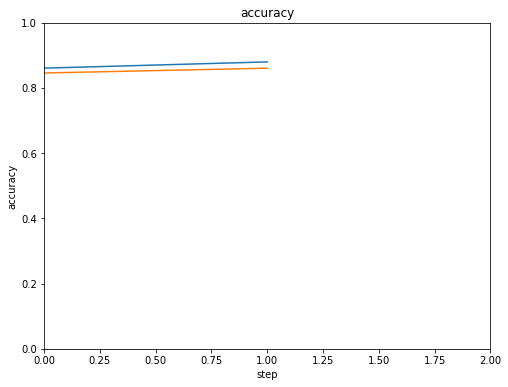

In [11]:
ohm.plot_result2(result[0],result[1],"loss function","step","loss function",0.0,4.0)
ohm.plot_result2(result[2],result[3],"accuracy","step","accuracy")